AML Assignment 1 - Neural Network - IMDB data set

Name: Krishna Kumar Tavva             
Due Date: 07-Jul-2024

In [32]:
# Using the IMDB data set
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Encoding the integer sequences via multi-hot encoding

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results


# Storing input data in vectors

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Converting output lables into floating-point numerical values

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Model 1 - imdb_mod1, 2 Hidden Layers - 32 Nodes Each, activation - relu, optimizer - rmsprop, loss - binary crossentropy`

In [33]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model using rmsprop optimizer

model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [34]:
# Training the model

imdb_mod1 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

imdb_dict = imdb_mod1.history
loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
acc = imdb_dict["accuracy"]
val_acc = imdb_dict["val_accuracy"]

Epoch 1/30
30/30 [==============================] - 2s 43ms/step - loss: 0.5071 - accuracy: 0.7657 - val_loss: 0.3514 - val_accuracy: 0.8749
Epoch 2/30
30/30 [==============================] - 0s 11ms/step - loss: 0.2937 - accuracy: 0.8949 - val_loss: 0.3137 - val_accuracy: 0.8751
Epoch 3/30
30/30 [==============================] - 0s 9ms/step - loss: 0.2183 - accuracy: 0.9213 - val_loss: 0.2991 - val_accuracy: 0.8786
Epoch 4/30
30/30 [==============================] - 0s 9ms/step - loss: 0.1788 - accuracy: 0.9364 - val_loss: 0.3166 - val_accuracy: 0.8752
Epoch 5/30
30/30 [==============================] - 0s 10ms/step - loss: 0.1491 - accuracy: 0.9475 - val_loss: 0.2908 - val_accuracy: 0.8869
Epoch 6/30
30/30 [==============================] - 0s 10ms/step - loss: 0.1249 - accuracy: 0.9572 - val_loss: 0.2965 - val_accuracy: 0.8856
Epoch 7/30
30/30 [==============================] - 0s 10ms/step - loss: 0.1088 - accuracy: 0.9626 - val_loss: 0.3328 - val_accuracy: 0.8817
Epoch 8/30
30/3

In [35]:
results_mod1 = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.8311 - accuracy: 0.8595


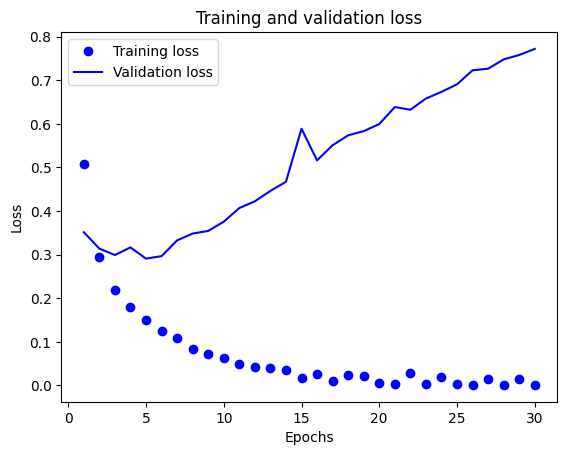

In [36]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

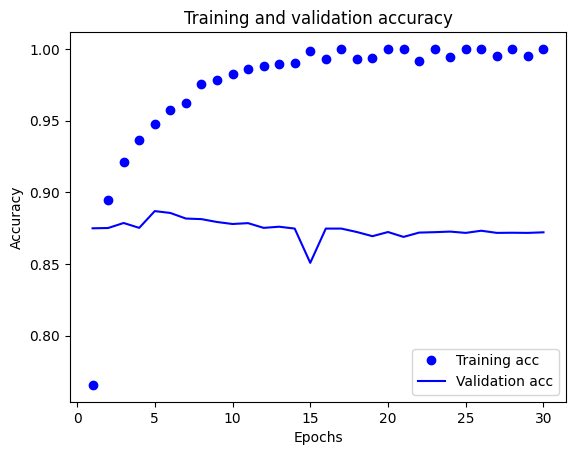

In [37]:
# Plotting the training and valication accuracy

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model 2 - imdb_mod2, 1 Hidden Layer - 32 Node, activation - relu, optimizer - rmsprop, loss - binary crossentropy

In [38]:
# Retraining the model from scratch

model = keras.Sequential([
    layers.Dense(32,activation='relu'),
     layers.Dense(1,activation='sigmoid')
])

# Compiling the model using rmsprop

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model

imdb_mod2 = model.fit(x_train,
                       y_train,
                       epochs=30,
                       batch_size=512,
                      validation_data=(x_val,y_val))

imdb_dict = imdb_mod2.history
loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
acc = imdb_dict["accuracy"]
val_acc = imdb_dict["val_accuracy"]

Epoch 1/30
49/49 [==============================] - 2s 27ms/step - loss: 0.4391 - accuracy: 0.8151 - val_loss: 0.2917 - val_accuracy: 0.9060
Epoch 2/30
49/49 [==============================] - 0s 8ms/step - loss: 0.2743 - accuracy: 0.9027 - val_loss: 0.2175 - val_accuracy: 0.9315
Epoch 3/30
49/49 [==============================] - 0s 8ms/step - loss: 0.2215 - accuracy: 0.9197 - val_loss: 0.1844 - val_accuracy: 0.9422
Epoch 4/30
49/49 [==============================] - 0s 8ms/step - loss: 0.1948 - accuracy: 0.9294 - val_loss: 0.1642 - val_accuracy: 0.9485
Epoch 5/30
49/49 [==============================] - 0s 8ms/step - loss: 0.1738 - accuracy: 0.9386 - val_loss: 0.1569 - val_accuracy: 0.9478
Epoch 6/30
49/49 [==============================] - 0s 8ms/step - loss: 0.1620 - accuracy: 0.9419 - val_loss: 0.1375 - val_accuracy: 0.9591
Epoch 7/30
49/49 [==============================] - 0s 8ms/step - loss: 0.1471 - accuracy: 0.9496 - val_loss: 0.1244 - val_accuracy: 0.9622
Epoch 8/30
49/49 [=

In [39]:
results_mod2 = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.6013 - accuracy: 0.8583


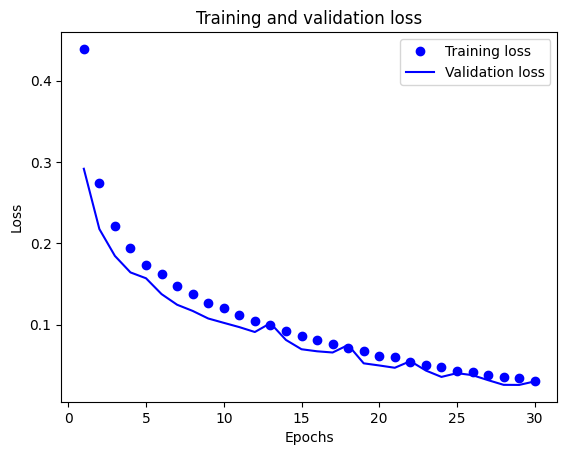

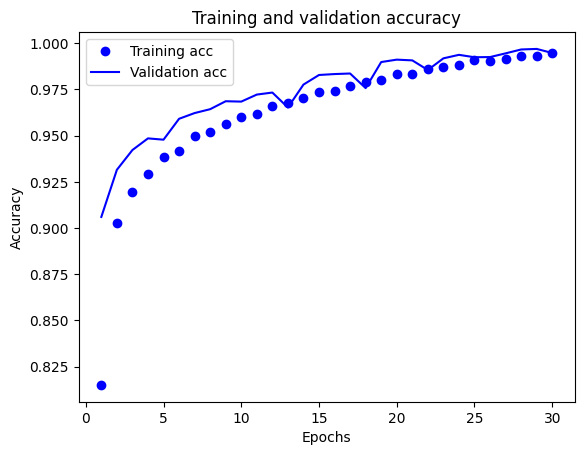

In [40]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and valication accuracy

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model 3 - imdb_mod3, 3 Hidden Layers - 32 Nodes, activation - relu, optimizer - rmsprop, loss - binary crossentropy


In [41]:
model = keras.Sequential([
    layers.Dense(32,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

# Compiling the model

model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])

# Training the model

imdb_mod3 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=30,
                       batch_size=512,
                       validation_data=(x_val,y_val))

imdb_dict = imdb_mod3.history
loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
acc = imdb_dict["accuracy"]
val_acc = imdb_dict["val_accuracy"]

Epoch 1/30
30/30 [==============================] - 2s 42ms/step - loss: 0.5259 - accuracy: 0.7485 - val_loss: 0.3911 - val_accuracy: 0.8467
Epoch 2/30
30/30 [==============================] - 0s 10ms/step - loss: 0.3127 - accuracy: 0.8827 - val_loss: 0.2943 - val_accuracy: 0.8846
Epoch 3/30
30/30 [==============================] - 0s 10ms/step - loss: 0.2302 - accuracy: 0.9155 - val_loss: 0.2866 - val_accuracy: 0.8840
Epoch 4/30
30/30 [==============================] - 0s 10ms/step - loss: 0.1882 - accuracy: 0.9309 - val_loss: 0.3104 - val_accuracy: 0.8790
Epoch 5/30
30/30 [==============================] - 0s 10ms/step - loss: 0.1481 - accuracy: 0.9459 - val_loss: 0.3350 - val_accuracy: 0.8709
Epoch 6/30
30/30 [==============================] - 0s 10ms/step - loss: 0.1335 - accuracy: 0.9514 - val_loss: 0.3676 - val_accuracy: 0.8724
Epoch 7/30
30/30 [==============================] - 0s 10ms/step - loss: 0.1080 - accuracy: 0.9641 - val_loss: 0.3326 - val_accuracy: 0.8803
Epoch 8/30
30

In [42]:
results_mod3 = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.9779 - accuracy: 0.8607


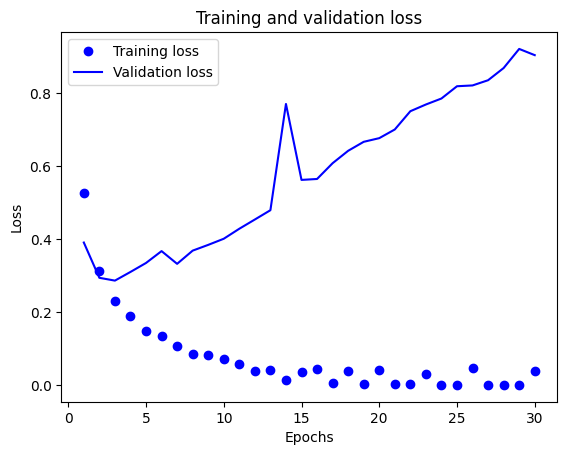

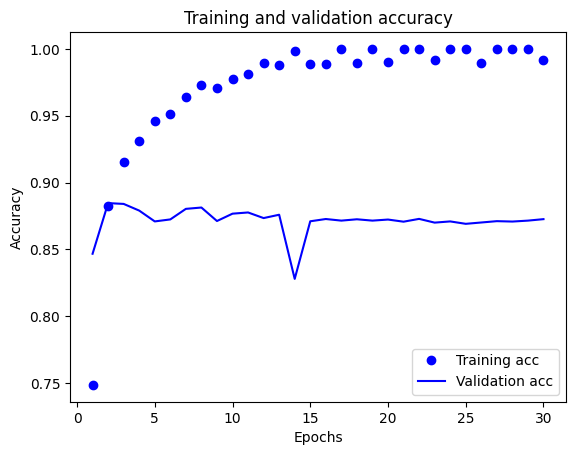

In [43]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and valication accuracy

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model 4 - imdb_mod4, 2 Hidden Layers - 64 Nodes, activation - relu, optimizer - rmsprop, loss - binary crossentropy

In [44]:
model = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

# Compiling the model

model.compile(optimizer="rmsprop",
             loss='binary_crossentropy',
             metrics=["accuracy"])

# Training the model

imdb_mod4 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=30,
                       batch_size=512,
                       validation_data=(x_val,y_val))

imdb_dict = imdb_mod4.history
loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
acc = imdb_dict["accuracy"]
val_acc = imdb_dict["val_accuracy"]

Epoch 1/30
30/30 [==============================] - 2s 46ms/step - loss: 0.5080 - accuracy: 0.7699 - val_loss: 0.4015 - val_accuracy: 0.8295
Epoch 2/30
30/30 [==============================] - 0s 13ms/step - loss: 0.3072 - accuracy: 0.8805 - val_loss: 0.4379 - val_accuracy: 0.8085
Epoch 3/30
30/30 [==============================] - 0s 12ms/step - loss: 0.2268 - accuracy: 0.9153 - val_loss: 0.2788 - val_accuracy: 0.8871
Epoch 4/30
30/30 [==============================] - 0s 12ms/step - loss: 0.1793 - accuracy: 0.9330 - val_loss: 0.3919 - val_accuracy: 0.8481
Epoch 5/30
30/30 [==============================] - 0s 15ms/step - loss: 0.1631 - accuracy: 0.9385 - val_loss: 0.2879 - val_accuracy: 0.8840
Epoch 6/30
30/30 [==============================] - 0s 13ms/step - loss: 0.1202 - accuracy: 0.9589 - val_loss: 0.3042 - val_accuracy: 0.8833
Epoch 7/30
30/30 [==============================] - 0s 13ms/step - loss: 0.1086 - accuracy: 0.9603 - val_loss: 0.3217 - val_accuracy: 0.8806
Epoch 8/30
30

In [45]:
results_mod4 = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.8392 - accuracy: 0.8635


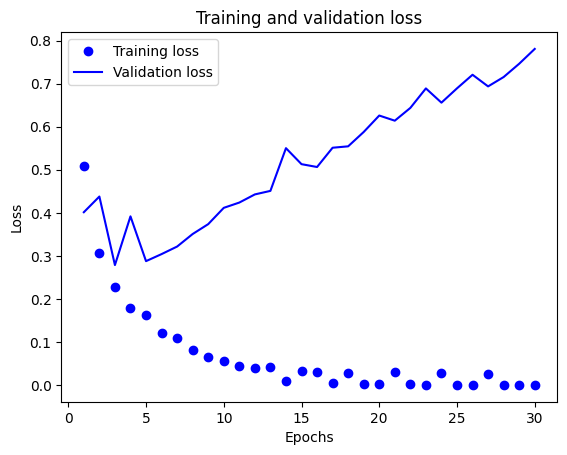

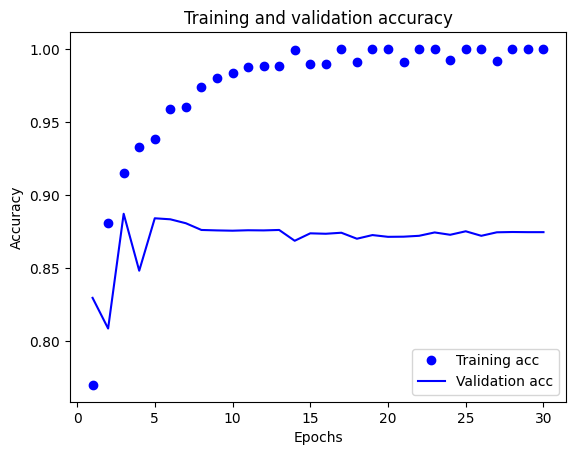

In [46]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and valication accuracy

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model 5 - imdb_mod5, 2 Hidden Layers - 32 Nodes, activation - relu, optimizer - rmsprop, loss - mse

In [47]:
model = keras.Sequential([
    layers.Dense(32,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

# Compiling the model

model.compile(optimizer="rmsprop",
             loss="mse",
             metrics=["accuracy"])

# Training the model

imdb_mod5 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=30,
                       batch_size=512,
                       validation_data=(x_val,y_val))

imdb_dict = imdb_mod5.history
loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
acc = imdb_dict["accuracy"]
val_acc = imdb_dict["val_accuracy"]

Epoch 1/30
30/30 [==============================] - 2s 42ms/step - loss: 0.1776 - accuracy: 0.7565 - val_loss: 0.1206 - val_accuracy: 0.8628
Epoch 2/30
30/30 [==============================] - 0s 9ms/step - loss: 0.0980 - accuracy: 0.8883 - val_loss: 0.0943 - val_accuracy: 0.8802
Epoch 3/30
30/30 [==============================] - 0s 9ms/step - loss: 0.0753 - accuracy: 0.9118 - val_loss: 0.0873 - val_accuracy: 0.8845
Epoch 4/30
30/30 [==============================] - 0s 10ms/step - loss: 0.0612 - accuracy: 0.9281 - val_loss: 0.0850 - val_accuracy: 0.8853
Epoch 5/30
30/30 [==============================] - 0s 10ms/step - loss: 0.0514 - accuracy: 0.9421 - val_loss: 0.0902 - val_accuracy: 0.8780
Epoch 6/30
30/30 [==============================] - 0s 9ms/step - loss: 0.0465 - accuracy: 0.9478 - val_loss: 0.0831 - val_accuracy: 0.8873
Epoch 7/30
30/30 [==============================] - 0s 9ms/step - loss: 0.0385 - accuracy: 0.9578 - val_loss: 0.0881 - val_accuracy: 0.8816
Epoch 8/30
30/30 

In [48]:
results_mod5 = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.1122 - accuracy: 0.8642


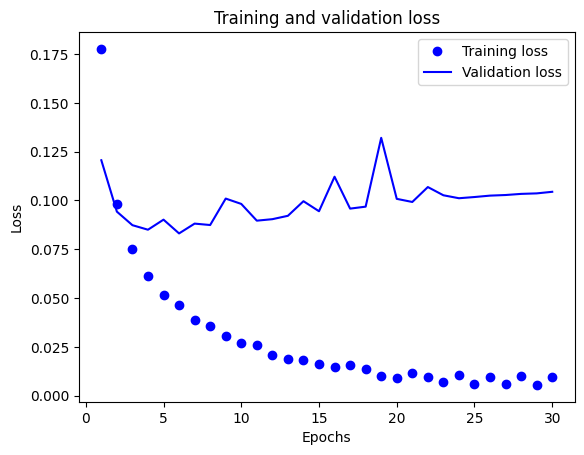

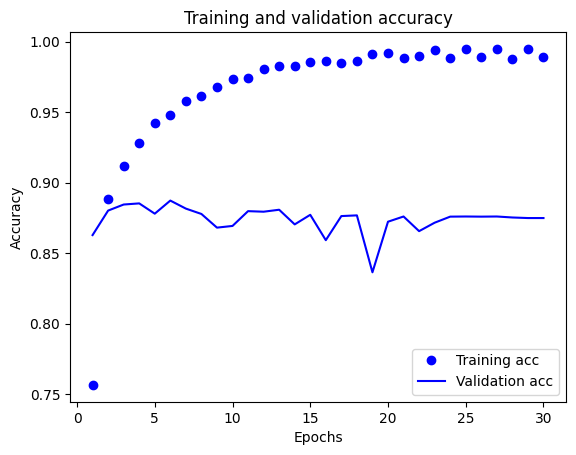

In [49]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and valication accuracy

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model 6 - imdb_mod6, 2 Hidden Layers - 32 Nodes, activation - tanh, optimizer - rmsprop, loss - binary crossentropy

In [50]:
model = keras.Sequential([
    layers.Dense(32,activation='tanh'),
    layers.Dense(32,activation='tanh'),
    layers.Dense(1,activation='sigmoid')
])

# Compiling the model

model.compile(optimizer="rmsprop",
             loss='binary_crossentropy',
             metrics=["accuracy"])

# Training the model

imdb_mod6 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=30,
                       batch_size=512,
                       validation_data=(x_val,y_val))

imdb_dict = imdb_mod6.history
loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
acc = imdb_dict["accuracy"]
val_acc = imdb_dict["val_accuracy"]

Epoch 1/30
30/30 [==============================] - 2s 42ms/step - loss: 0.4946 - accuracy: 0.7890 - val_loss: 0.3621 - val_accuracy: 0.8562
Epoch 2/30
30/30 [==============================] - 0s 11ms/step - loss: 0.2755 - accuracy: 0.8977 - val_loss: 0.3172 - val_accuracy: 0.8673
Epoch 3/30
30/30 [==============================] - 0s 10ms/step - loss: 0.1985 - accuracy: 0.9267 - val_loss: 0.2777 - val_accuracy: 0.8890
Epoch 4/30
30/30 [==============================] - 0s 9ms/step - loss: 0.1678 - accuracy: 0.9351 - val_loss: 0.2926 - val_accuracy: 0.8826
Epoch 5/30
30/30 [==============================] - 0s 9ms/step - loss: 0.1243 - accuracy: 0.9547 - val_loss: 0.3395 - val_accuracy: 0.8727
Epoch 6/30
30/30 [==============================] - 0s 9ms/step - loss: 0.1168 - accuracy: 0.9561 - val_loss: 0.3840 - val_accuracy: 0.8720
Epoch 7/30
30/30 [==============================] - 0s 10ms/step - loss: 0.0914 - accuracy: 0.9677 - val_loss: 0.4197 - val_accuracy: 0.8638
Epoch 8/30
30/30

In [51]:
results_mod6 = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.9765 - accuracy: 0.8514


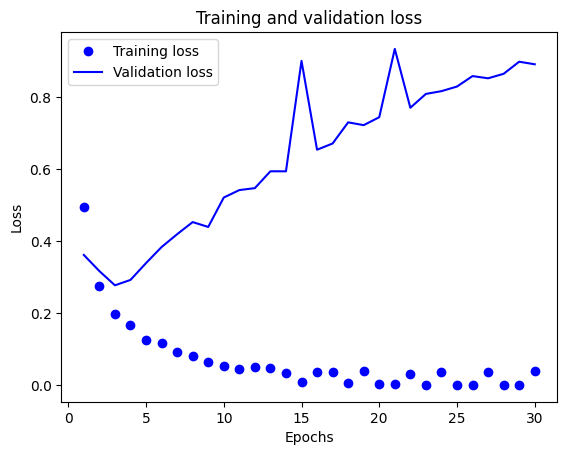

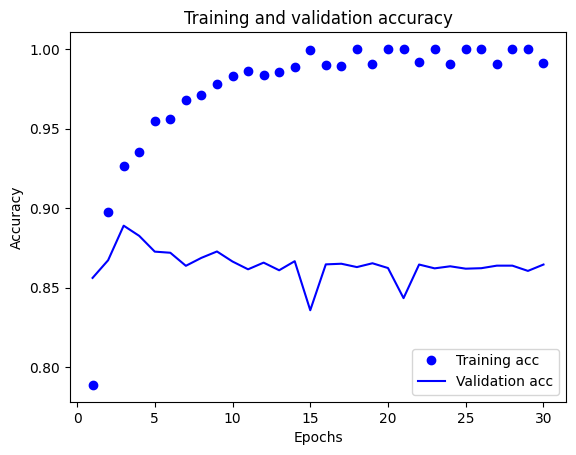

In [52]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and valication accuracy

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model 7 - imdb_mod7, 2 Hidden Layers - 32 Nodes, activation - relu, optimizer - rmsprop, loss - binary crossentropy, dropuout = 0.5

In [53]:
model = keras.Sequential([
    layers.Dense(32,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(32,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

# Compiling the model

model.compile(optimizer="rmsprop",
             loss='binary_crossentropy',
             metrics=["accuracy"])

# Training the model

imdb_mod7 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=30,
                       batch_size=512,
                       validation_data=(x_val,y_val))

imdb_dict = imdb_mod7.history
loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
acc = imdb_dict["accuracy"]
val_acc = imdb_dict["val_accuracy"]

Epoch 1/30
30/30 [==============================] - 2s 42ms/step - loss: 0.5811 - accuracy: 0.7007 - val_loss: 0.4249 - val_accuracy: 0.8488
Epoch 2/30
30/30 [==============================] - 0s 12ms/step - loss: 0.4158 - accuracy: 0.8371 - val_loss: 0.3335 - val_accuracy: 0.8689
Epoch 3/30
30/30 [==============================] - 0s 10ms/step - loss: 0.3252 - accuracy: 0.8806 - val_loss: 0.2847 - val_accuracy: 0.8887
Epoch 4/30
30/30 [==============================] - 0s 10ms/step - loss: 0.2680 - accuracy: 0.9082 - val_loss: 0.2766 - val_accuracy: 0.8876
Epoch 5/30
30/30 [==============================] - 0s 10ms/step - loss: 0.2277 - accuracy: 0.9233 - val_loss: 0.2741 - val_accuracy: 0.8876
Epoch 6/30
30/30 [==============================] - 0s 10ms/step - loss: 0.1894 - accuracy: 0.9341 - val_loss: 0.2828 - val_accuracy: 0.8887
Epoch 7/30
30/30 [==============================] - 0s 10ms/step - loss: 0.1600 - accuracy: 0.9480 - val_loss: 0.3352 - val_accuracy: 0.8768
Epoch 8/30
30

In [54]:
results_mod7 = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.9147 - accuracy: 0.8682


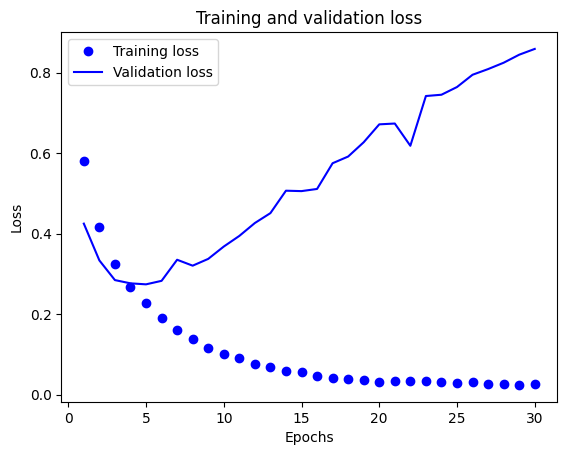

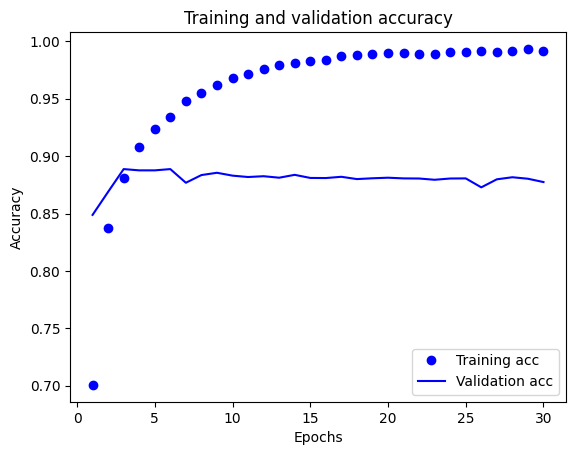

In [55]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and valication accuracy

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model 8 - imdb_mod8, 2 Hidden Layers - 32 Nodes, activation - relu, optimizer - rmsprop, loss - binary crossentropy, regularisation - l2 (0.001)

In [56]:
model = keras.Sequential([
    layers.Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1,activation='sigmoid')
])

# Compiling the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model

imdb_mod8 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=30,
                       batch_size=512,
                       validation_data = (x_val,y_val))

imdb_dict = imdb_mod8.history
loss_values = imdb_dict["loss"]
val_loss_values = imdb_dict["val_loss"]
acc = imdb_dict["accuracy"]
val_acc = imdb_dict["val_accuracy"]

Epoch 1/30
30/30 [==============================] - 2s 44ms/step - loss: 0.5863 - accuracy: 0.7882 - val_loss: 0.4847 - val_accuracy: 0.8398
Epoch 2/30
30/30 [==============================] - 0s 10ms/step - loss: 0.3905 - accuracy: 0.8910 - val_loss: 0.4090 - val_accuracy: 0.8690
Epoch 3/30
30/30 [==============================] - 0s 10ms/step - loss: 0.3179 - accuracy: 0.9154 - val_loss: 0.3590 - val_accuracy: 0.8877
Epoch 4/30
30/30 [==============================] - 0s 10ms/step - loss: 0.2772 - accuracy: 0.9275 - val_loss: 0.3498 - val_accuracy: 0.8869
Epoch 5/30
30/30 [==============================] - 0s 10ms/step - loss: 0.2521 - accuracy: 0.9371 - val_loss: 0.3515 - val_accuracy: 0.8845
Epoch 6/30
30/30 [==============================] - 0s 10ms/step - loss: 0.2337 - accuracy: 0.9444 - val_loss: 0.4114 - val_accuracy: 0.8698
Epoch 7/30
30/30 [==============================] - 0s 10ms/step - loss: 0.2177 - accuracy: 0.9501 - val_loss: 0.3638 - val_accuracy: 0.8844
Epoch 8/30
30

In [57]:
results_mod8 = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.5169 - accuracy: 0.8609


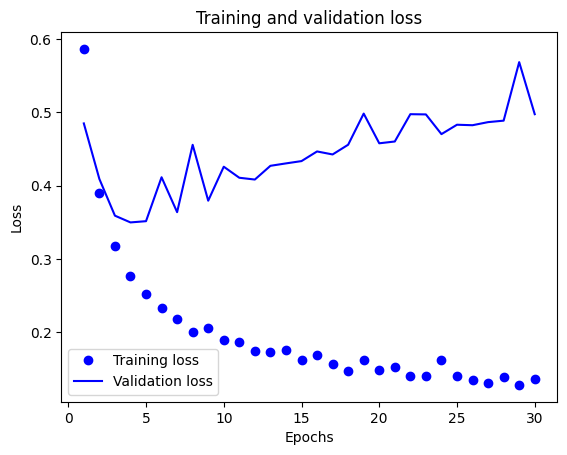

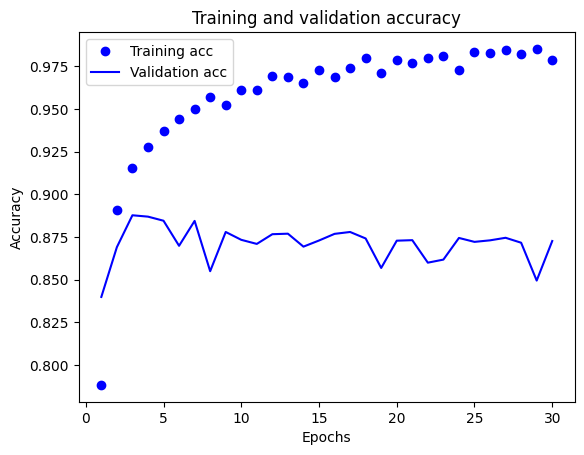

In [58]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Plotting the training and valication accuracy

plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Test Evaluation**

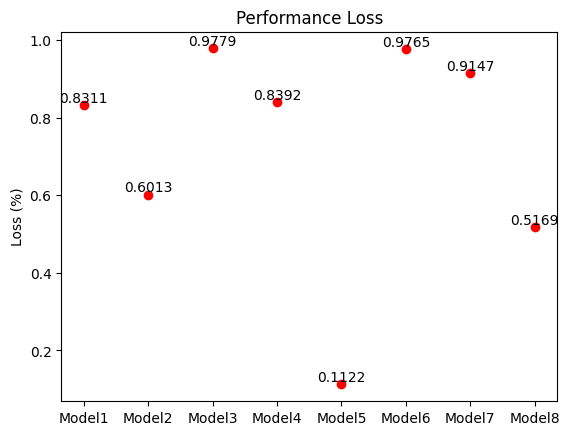

In [61]:
Models = ('Model1','Model2','Model3', 'Model4', 'Model5','Model6','Model7', 'Model8')
Loss = (0.8311, 0.6013, 0.9779, 0.8392, 0.1122, 0.9765, 0.9147, 0.5169)

plt.scatter(Models,Loss,color='red')
plt.title('Performance Loss')
plt.ylabel('Loss (%)')

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

**Observations**:

MModel 5 is the only model with least loss value during the evaluation on the test set.

Model 5 was built using 2 Hidden Layers - 32 Nodes, activation - relu, optimizer - rmsprop, loss - mse.

**Accuracy Evaluation**

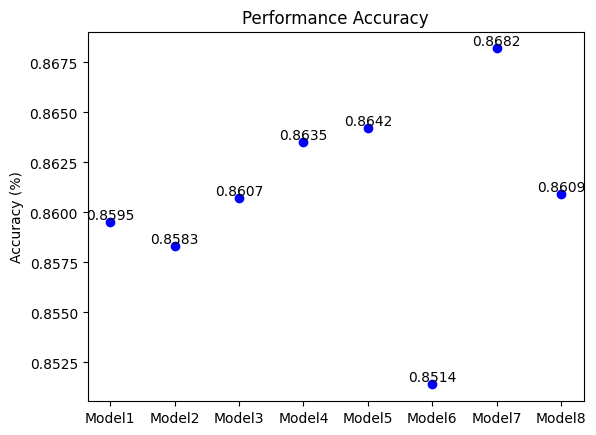

In [62]:
Models = ('Model1','Model2','Model3','Model4','Model5','Model6','Model7','Model8')
Accuracy = (0.8595, 0.8583, 0.8607, 0.8635, 0.8642, 0.8514, 0.8682, 0.8609)

plt.scatter(Models,Accuracy,color='blue')
plt.title('Performance Accuracy')
plt.ylabel('Accuracy (%)')

for (xi, yi) in zip(Models,Accuracy):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

**Observations**:

Model 5 and Model 7 are the models with the highest accuracy among all the other models.

Model 5 was built using 2 Hidden Layers - 32 Nodes, activation - relu, optimizer - rmsprop, loss - mse.

Model 7 was built 2 Hidden Layers - 32 Nodes, activation - relu, optimizer - rmsprop, loss - binary crossentropy, dropuout = 0.5

**Conclusion**

To decide the best model, there are two ways

i) model with Least Loss on the Test Set with considerable accuracy.

the best model is Model 5

i.e. model with 2 Hidden Layers - 32 Nodes, activation - relu, optimizer - rmsprop, loss - mse.

ii) model with Highest Accuracy on the Test Set.

the best model is Model 7

i.e. model with 2 hidden layers, 32 nodes per layer, activated with relu, dropout rate of 0.5 per layer, optimizer being rmsprop and loss function being binary crossentropy resulted in the highest accuracy among all the other models i.e. 86.82%.

In reality, mse isn't a good loss function to be used for binary/multi-class classification since it is is a good loss function for regression based problems. Therefore, the best model is the one with the highest accuracy i.e. Model 7